In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#GRAM-SCHMIDT
def metodo_QR(A):
    A_0 = np.copy(A)
    a,b = np.shape(A)
    for i in range(10000):
        Q,R = np.linalg.qr(A_0)
        A_0 = np.dot(R,Q)
        if A[a-1][b-2] == 0:
          break
    return A_0

In [148]:

def householder(A,m,n):

  #Operando somente na sub matriz que F age
  for k in range(n):
    x = A[k:,k]
    x_t = []
    x_t.append(x)
    e = np.zeros(len(x))
    e[0] = 1.
    e1 = []
    e1.append(e)
    v = np.sign(x[0])*np.linalg.norm(np.transpose(x_t))*np.transpose(e1) + np.transpose(x_t)
    A[k:,k:] = A[k:,k:] - 2.0*(np.dot(v,np.dot(np.transpose(v),A[k:,k:])))/np.dot(np.transpose(v),v)

def hilbertMatrix(ord):

  H = np.zeros((ord,ord))

  for i in range(ord):
    for j in range(ord):
      
      H[i][j] = 1./(i+1 + j)


  return H    

    
 

Hilbert
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0

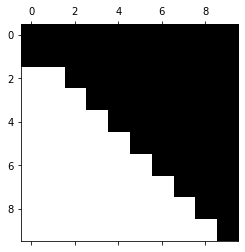

In [149]:
#Metodo incorreto para produzir os outovalores, mas o mantive para efeito de comparação
# caso usássemos só a triangularização de Householder

H = hilbertMatrix(10)
print("Hilbert")
print(H)
print("==============================================================================================")
print()

print("==============================================================================================")
print("================OUTO VALORES USANDO TRIANGULARIZAÇÃO QR VIA HOUSEHOLDER======================")
print("=============================Metodo incorreto==================================================")
print()
householder(H,10 ,10)
print("Hilbert triangular superior")
print(H)
print("=================================OUTO VALORES =================================================")
U_qrh = []
for i in range(10):
  print("u_",i,"=",H[i][i])
  U_qrh.append(H[i][i])

plt.spy(H, precision=1e-16)

Hilbert
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0

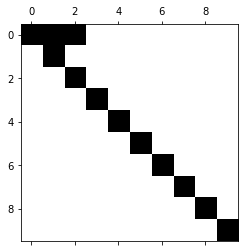

In [150]:
H = hilbertMatrix(10)
print("Hilbert")
print(H)
print("==============================================================================================")
print()

print("==============================================================================================")
print("================OUTO VALORES USANDO TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT======================")
print("==============================================================================================")
print()
H_02 = metodo_QR(H)
print("Hilbert triangular superior")
print(H_02)
print("=================================OUTO VALORES =================================================")
U_qr = []
for i in range(10):
  print("u_",i,"=",H[i][i])
  U_qr.append(H[i][i])
plt.spy(H_02, precision=1e-16)

In [151]:
H = hilbertMatrix(10)
print("Hilbert")
print(H)
print("==============================================================================================")
print()

print("==============================================================================================")
print("================OUTO VALORES USANDO LINALG.EIGVALS============================================")
print("==============================================================================================")
print()
print("=================================OUTO VALORES =================================================")

U_linalg = np.linalg.eigvals(H)
for i in range(len(U_linalg)):
  print("u_",i,"=",U_linalg[i])


Hilbert
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0

=======ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA HOUSEHOLDER============


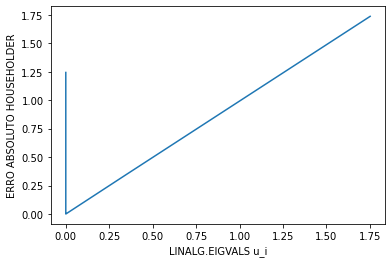

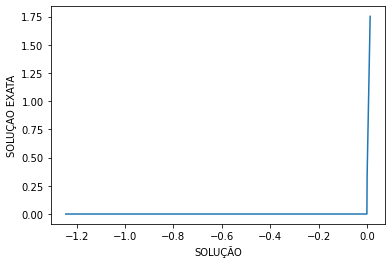

In [157]:
print("==============================================================================================")
print("=======ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA HOUSEHOLDER============")
print("==============================================================================================")


X = np.sort(U_linalg)
Y = np.sort(U_qrh)
ERRO1 = []
label = []
for i in range(len(X)):
  ERRO1.append(abs(X[i]-Y[i]))


plt.plot(X,ERRO1)

plt.xlabel('LINALG.EIGVALS u_i')
plt.ylabel('ERRO ABSOLUTO HOUSEHOLDER')

plt.show()

plt.plot(Y,X)
plt.xlabel('SOLUÇÃO')
plt.ylabel('SOLUÇAO EXATA')
plt.show()


=======ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT============


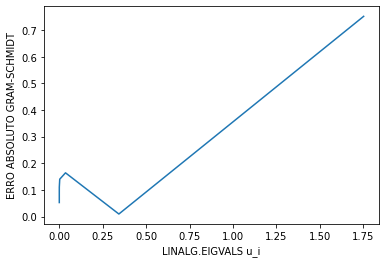

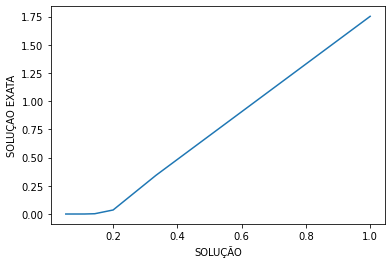

In [158]:
print("==============================================================================================")
print("=======ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT============")
print("==============================================================================================")


X = np.sort(U_linalg)
Y = np.sort(U_qr)
ERRO2 = []
label = []
for i in range(len(X)):
  ERRO2.append(abs(X[i]-Y[i]))
 

plt.plot(X,ERRO2)

plt.xlabel('LINALG.EIGVALS u_i')
plt.ylabel('ERRO ABSOLUTO GRAM-SCHMIDT')

plt.show()

plt.plot(Y,X)
plt.xlabel('SOLUÇÃO')
plt.ylabel('SOLUÇAO EXATA')
plt.show()


In [159]:
# Chegando a uma falsa matriz de Hessenberg triangularizando 
#usando somente a triagularização de Househouder adaptada para zerar abaixo da segunda diagonal

def False_hessenberg(A,m,n):

  for k in range(n-1):
    x = A[k+1:,k]
    x_t = []
    x_t.append(x)
    e = np.zeros(len(x))
    e[0] = 1.
    e1 = []
    e1.append(e)
    v = np.sign(x[0])*np.linalg.norm(np.transpose(x_t))*np.transpose(e1) + np.transpose(x_t)
    A[k+1:,k:] = A[k+1:,k:] - 2.0*(np.dot(v,np.dot(np.transpose(v),A[k+1:,k:])))/np.dot(np.transpose(v),v)

Hilbert
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0

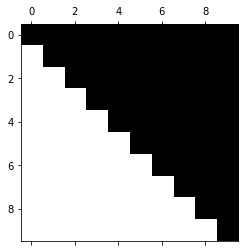

In [160]:
H = hilbertMatrix(10)
print("Hilbert")
print(H)

print("==============================================================================================")
print("========================== MATRIZ DE  HESSENBERG =============================================")
print("==============================================================================================")
print()
False_hessenberg(H,10,10)
print(H)
print("==============================================================================================")
print("================OUTO VALORES USANDO TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT======================")
print("==============================================================================================")

H_02 = metodo_QR(H)
print(H_02)

print()
print("=================================OUTO VALORES =================================================")


U_qrH = []
for i in range(10):
  print("u_",i,"=",H_02[i][i])
  U_qrH.append(H_02[i][i])

plt.spy(H_02, precision=1e-16)

ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT E MATRIZ DE HESSENBERG


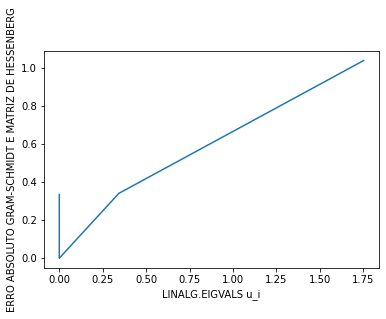

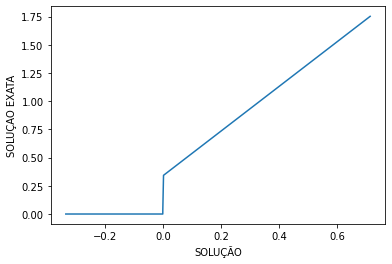

In [162]:
print("==============================================================================================")
print("ERRO DOS OUTO VALORES LINALG.EIGVALS X TRIANGULARIZAÇÃO QR VIA GRAM-SCHMIDT E MATRIZ DE HESSENBERG")
print("==============================================================================================")


X = np.sort(U_linalg)
Y = np.sort(U_qrH)
ERRO3 = []
label = []
for i in range(len(X)):
  ERRO3.append(abs(X[i]-Y[i]))

plt.plot(X,ERRO3)
plt.xlabel('LINALG.EIGVALS u_i')
plt.ylabel('ERRO ABSOLUTO GRAM-SCHMIDT E MATRIZ DE HESSENBERG')

plt.show()

plt.plot(Y,X)
plt.xlabel('SOLUÇÃO')
plt.ylabel('SOLUÇAO EXATA')
plt.show()

In [164]:
# Conseguindo a real matriz de Hessenberg (H) pela forma Q^t * A * Q = H
# Usando Householder para obter Q recursivamente. 
# Mais uma vez fazendo a oberação na sub matriz em A de interesse

def hessenberg(A,m,n):

  for k in range(n-1):
    
    x = A[k+1:,k]
    x_t = []
    x_t.append(x)
    e = np.zeros(len(x))
    e[0] = 1.
    e1 = []
    e1.append(e)
    v = np.sign(x[0])*np.linalg.norm(np.transpose(x_t))*np.transpose(e1) + np.transpose(x_t)
  
    H = np.eye(len(A[k+1:,k:])) - (2.0*np.outer(v,v))/np.dot(np.transpose(v),v)

    A[k+1:,k:] = np.dot(np.transpose(H),A[k+1:,k:])
    A[k:,k+1:] = np.dot(A[k:,k+1:],H)




Hilbert
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0

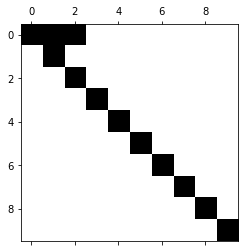

In [167]:
from matplotlib.font_manager import json_load
H = hilbertMatrix(10)
print("Hilbert")
print(H)

print("==============================================================================================")
print("========================== MATRIZ DE  HESSENBERG =============================================")
print("==============================================================================================")
print()
hessenberg(H,10,10)
print(H)

H_03 = metodo_QR(H)
plt.spy(H_03, precision=1e-16)

U_qrHT = []
for i in range(10):
  print("u_",i,"=",H_03[i][i])
  U_qrHT.append(H_03[i][i])




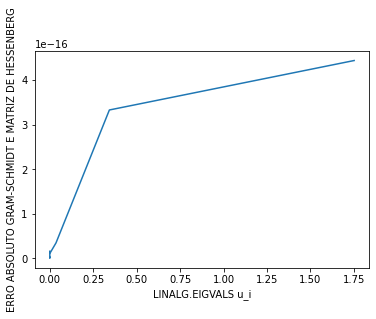

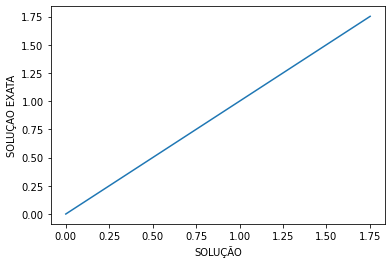

In [166]:
X = np.sort(U_linalg)
Y = np.sort(U_qrHT)
ERRO4 = []
label = []
for i in range(len(X)):
  ERRO4.append(abs(X[i]-Y[i]))

plt.plot(X,ERRO4)
plt.xlabel('LINALG.EIGVALS u_i')
plt.ylabel('ERRO ABSOLUTO GRAM-SCHMIDT E MATRIZ DE HESSENBERG')

plt.show()

plt.plot(Y,X)
plt.xlabel('SOLUÇÃO')
plt.ylabel('SOLUÇAO EXATA')
plt.show()

================================COMPARAÇÃO====================================================


Text(0, 0.5, 'ERRO ABSOLUTO')

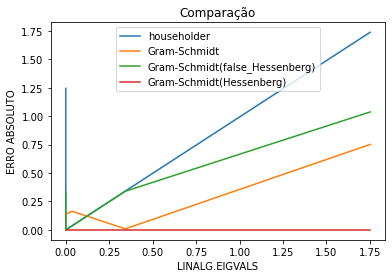

In [169]:
print("==============================================================================================")
print("================================COMPARAÇÃO====================================================")
print("==============================================================================================")


plt.plot(X,ERRO1, label="householder")
plt.plot(X,ERRO2, label="Gram-Schmidt")
plt.plot(X,ERRO3, label="Gram-Schmidt(false_Hessenberg)")
plt.plot(X,ERRO4, label="Gram-Schmidt(Hessenberg)")

plt.title('Comparação')
plt.legend()
plt.xlabel('LINALG.EIGVALS')
plt.ylabel('ERRO ABSOLUTO')
